Для увеличения лояльности клиентов банка им дается выбор из различных магазинов, где клиент может совершить покупки с кэшбэком. Вам предоставлены данные и транзакционной активности клиентов за 2022г. При это данные поделены
на 2 участка: последние 3 месяца и предшествующие им. Так же кэшбэк делится на 2 типа от банки и от партнеров. Для лучшей осведомленности клиентом им могут рассылаться различные коммуникации о магазинах, где у них есть кэшбэк. В данном
исследовании коммуникации не разбиты по типам, а лишь есть общее число полученных клиентом коммуникаций.

1. Как взаимосвязаны коммуникации на покупки с кэшбэком?
2. Как взаимосвязаны обороты клиентов и выплаченный кэшбэк?
3. 3 месяца назад произшло глобальное обновление приложения в т.ч. методики взаимодействия с пользователем. Необходимо оценить эффект обновления.
4. Выдвините собственную гипотезу на основе имеющихся данных.

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t, norm
from scipy import stats as st

In [2]:
data = pd.read_csv('tinkoff_chashback.csv', sep=',')

In [3]:
data.isna().sum()

client_id                0
cb_merch_last_3_month    0
cb_bank_last_3_month     0
cb_merch_before          0
cb_bank_before           0
cnt_communication        0
cnt_activation           0
cnt_view                 0
Air                      0
Beauty shop              0
Book store               0
Children                 0
Cinema                   0
Clothes                  0
Electronics              0
Fastfood                 0
Fuel                     0
House                    0
Jewelry                  0
Other                    0
Pet shop                 0
Pharmacies               0
Supermarkets             0
Taxi                     0
Transport                0
Air_before               0
Beauty shop_before       0
Book store_before        0
Children_before          0
Cinema_before            0
Clothes_before           0
Electronics_before       0
Fastfood_before          0
Fuel_before              0
House_before             0
Jewelry_before           0
Other_before             0
P

In [4]:
data.duplicated().sum()

0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              50000 non-null  int64  
 1   cb_merch_last_3_month  50000 non-null  float64
 2   cb_bank_last_3_month   50000 non-null  float64
 3   cb_merch_before        50000 non-null  float64
 4   cb_bank_before         50000 non-null  float64
 5   cnt_communication      50000 non-null  int64  
 6   cnt_activation         50000 non-null  int64  
 7   cnt_view               50000 non-null  int64  
 8   Air                    50000 non-null  float64
 9   Beauty shop            50000 non-null  float64
 10  Book store             50000 non-null  float64
 11  Children               50000 non-null  float64
 12  Cinema                 50000 non-null  float64
 13  Clothes                50000 non-null  float64
 14  Electronics            50000 non-null  float64
 15  Fa

In [6]:
data = data[(data['cb_merch_last_3_month'] != 0) & (data['cnt_communication'] != 0)]

In [7]:
data = data[(data['cb_bank_last_3_month'] != 0) & (data['cnt_communication'] != 0)]

In [8]:
data = data[(data['cb_merch_before'] != 0) & (data['cnt_communication'] != 0)]

In [9]:
data = data[(data['cb_bank_before'] != 0) & (data['cnt_communication'] != 0)]

In [10]:
data.shape

(8535, 42)

<Axes: >

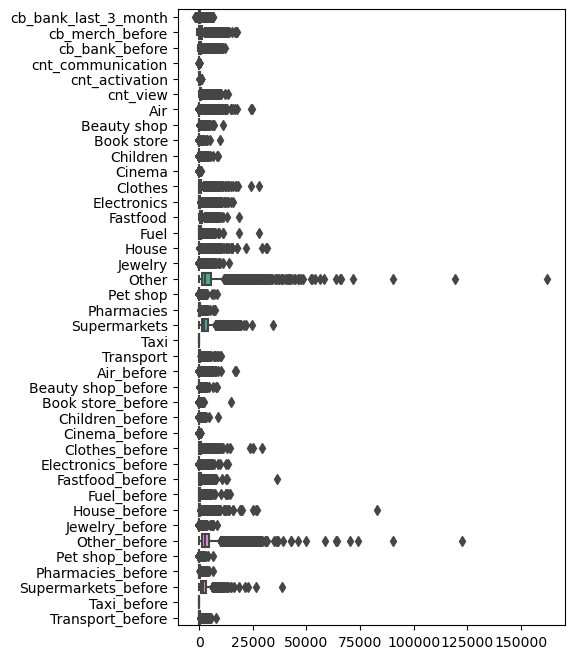

In [11]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=data.iloc[:, 2:], orient='h')

In [12]:
data.describe()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
count,8.535000e+03,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,...,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.0,8535.000000
mean,4.333571e+08,778.168366,418.965436,979.926889,709.759813,2.826245,181.893146,631.402109,274.564148,115.231634,...,671.291623,362.229877,393.323257,58.567077,3809.370592,51.936028,208.405272,2320.921148,0.0,272.869596
std,2.369575e+08,1315.381075,672.569530,1600.506354,1139.835032,1.641010,118.395107,807.089387,1109.487901,340.796231,...,900.550023,656.500557,1435.189628,272.291836,4650.764333,175.177660,287.495929,1855.314565,0.0,413.970150
min,1.009660e+05,-2850.000000,-1839.000000,-815.000000,-326.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.478335e+08,62.000000,27.000000,104.000000,71.000000,2.000000,89.000000,207.000000,0.000000,0.000000,...,152.000000,0.000000,0.000000,0.000000,1194.500000,0.000000,41.000000,1044.000000,0.0,30.000000
50%,3.835324e+08,270.000000,150.000000,349.000000,240.000000,2.000000,169.000000,421.000000,0.000000,0.000000,...,410.000000,79.000000,35.000000,0.000000,2507.000000,0.000000,119.000000,1907.000000,0.0,130.000000
75%,6.452224e+08,874.500000,505.000000,1114.500000,834.000000,4.000000,249.000000,729.000000,0.000000,85.000000,...,887.500000,520.000000,278.500000,6.000000,4782.500000,23.000000,266.000000,3138.000000,0.0,352.500000
max,9.051842e+08,21665.000000,6531.000000,17590.000000,11943.000000,17.000000,712.000000,13462.000000,24411.000000,10950.000000,...,36156.000000,14544.000000,82752.000000,8270.000000,122630.000000,6223.000000,6239.000000,38540.000000,0.0,7864.000000


In [13]:
for c in list(data.columns)[1:]:
    q3 = data[c].describe()['75%']    # 75-ая квантиль
    q1 = data[c].describe()['25%']    # 25-ая квантиль
    iqr = q3-q1    # длина промежутка
    iqr_min = q1 - 1.5 * iqr    # нижняя граница
    iqr_max = q3 + 1.5 * iqr    # врехняя граница
    data.loc[(iqr_min >= data[c]) | (data[c] >= iqr_max), c] = data[c].describe()['50%']

<Axes: >

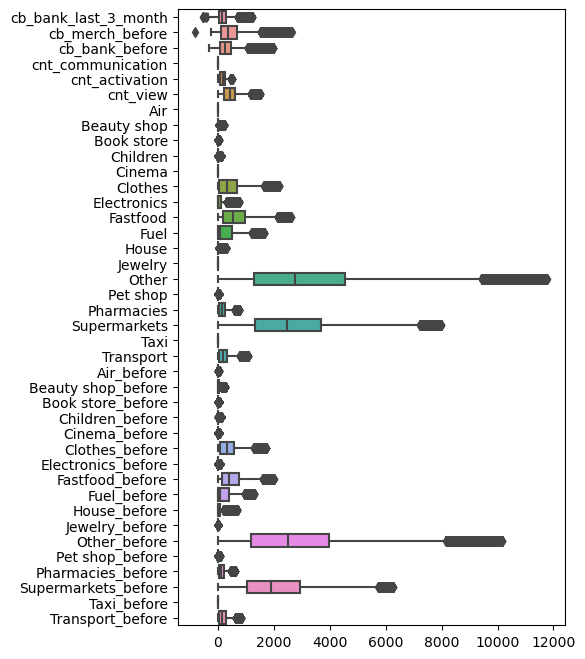

In [14]:
plt.figure(figsize=(5, 8))
sns.boxplot(data=data.iloc[:, 2:], orient='h')

In [15]:
data.describe()

,client_id,cb_merch_last_3_month,cb_bank_last_3_month,cb_merch_before,cb_bank_before,cnt_communication,cnt_activation,cnt_view,Air,Beauty shop,...,Fastfood_before,Fuel_before,House_before,Jewelry_before,Other_before,Pet shop_before,Pharmacies_before,Supermarkets_before,Taxi_before,Transport_before
count,8.535000e+03,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.0,8535.000000,...,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.000000,8535.0,8535.000000
mean,4.333571e+08,388.672291,229.028354,514.428940,372.573169,2.675220,174.879203,447.938606,0.0,21.435618,...,508.688928,231.757352,84.751494,0.359110,2908.771529,3.777153,149.033509,2103.572583,0.0,182.310838
std,2.369575e+08,454.396458,276.078899,590.286129,440.238940,1.406558,106.879566,319.014853,0.0,45.366115,...,454.911588,323.557305,144.868293,1.756181,2250.798786,10.230139,139.075787,1390.816802,0.0,195.191180
min,1.009660e+05,-1052.000000,-547.000000,-815.000000,-326.000000,1.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,2.478335e+08,63.000000,27.000000,104.000000,71.000000,2.000000,89.000000,207.000000,0.0,0.000000,...,152.000000,0.000000,0.000000,0.000000,1194.500000,0.000000,41.000000,1044.000000,0.0,30.000000
50%,3.835324e+08,270.000000,150.000000,349.000000,240.000000,2.000000,169.000000,421.000000,0.0,0.000000,...,410.000000,79.000000,35.000000,0.000000,2507.000000,0.000000,119.000000,1907.000000,0.0,130.000000
75%,6.452224e+08,499.000000,300.000000,671.000000,471.000000,4.000000,242.000000,598.000000,0.0,17.000000,...,735.000000,382.500000,83.000000,0.000000,3983.000000,0.000000,215.000000,2918.000000,0.0,269.000000
max,9.051842e+08,2088.000000,1221.000000,2630.000000,1976.000000,6.000000,488.000000,1511.000000,0.0,212.000000,...,1988.000000,1299.000000,696.000000,14.000000,10162.000000,57.000000,603.000000,6269.000000,0.0,836.000000


In [16]:
data.columns = [c.lower() for c in data.columns]
data.columns = data.columns.str.replace(' ', '_')

In [17]:
data_col = data.columns[data.columns.str.contains('before')]

In [18]:
data_before = data[data_col].copy()

In [19]:
data_before['client_id'] = data['client_id'].copy()
data_before['cnt_communication'] = data['cnt_communication'].copy()
data_before = data_before.reset_index()
data_before = data_before.iloc[:, 1:]

In [20]:
data_before.head()

,cb_merch_before,cb_bank_before,air_before,beauty_shop_before,book_store_before,children_before,cinema_before,clothes_before,electronics_before,fastfood_before,...,house_before,jewelry_before,other_before,pet_shop_before,pharmacies_before,supermarkets_before,taxi_before,transport_before,client_id,cnt_communication
0,119.0,125.0,0.0,138.0,0.0,66.0,0.0,1263.0,26.0,498.0,...,35.0,0.0,6232.0,0.0,91.0,5356.0,0.0,119.0,162353149,6
1,27.0,386.0,0.0,0.0,0.0,0.0,0.0,223.0,0.0,7.0,...,0.0,0.0,1643.0,0.0,87.0,1409.0,0.0,70.0,267972954,1
2,772.0,34.0,0.0,11.0,2.0,19.0,0.0,9.0,0.0,1125.0,...,3.0,0.0,625.0,13.0,39.0,2631.0,0.0,25.0,249119720,5
3,2301.0,1801.0,0.0,0.0,0.0,0.0,13.0,314.0,35.0,629.0,...,35.0,0.0,2119.0,0.0,207.0,2026.0,0.0,312.0,306249640,3
4,180.0,180.0,0.0,0.0,0.0,0.0,29.0,604.0,0.0,480.0,...,312.0,0.0,2672.0,0.0,212.0,3981.0,0.0,329.0,21610775,3


In [21]:
data_b_sum = pd.DataFrame({'cashback': data_before['cb_merch_before'] + data_before['cb_bank_before'], 
                           'sum_b': data_before.iloc[:, 2:-2].sum(axis=1), 
                           'count': data_before['cnt_communication']})

In [22]:
data_b_sum

,cashback,sum_b,count
0,244.0,13981.0,6
1,413.0,3508.0,1
2,806.0,4581.0,5
3,4102.0,6029.0,3
4,360.0,9051.0,3
...,...,...,...
8530,589.0,6778.0,2
8531,272.0,5657.0,1
8532,1310.0,11526.0,3
8533,1096.0,1980.0,1


In [23]:
data_c = list(set(data.columns) - set(data_col))

In [24]:
data_after = data[data_c].copy()
data_after = data_after.reset_index()
data_after = data_after.iloc[:, 1:]

In [25]:
data_after.head()

,electronics,book_store,taxi,fuel,cb_merch_last_3_month,cb_bank_last_3_month,cnt_view,clothes,fastfood,pet_shop,...,house,client_id,jewelry,supermarkets,air,children,pharmacies,transport,cnt_communication,other
0,0.0,8.0,0.0,335.0,282.0,141.0,606,1285.0,815.0,0.0,...,23.0,162353149,0.0,4492.0,0.0,13.0,388.0,99.0,6,5265.0
1,0.0,0.0,0.0,0.0,200.0,990.0,1179,444.0,31.0,0.0,...,0.0,267972954,0.0,2336.0,0.0,0.0,608.0,140.0,1,1625.0
2,0.0,0.0,0.0,1458.0,6.0,5.0,440,100.0,1283.0,24.0,...,25.0,249119720,0.0,3193.0,0.0,17.0,129.0,196.0,5,1804.0
3,0.0,0.0,0.0,372.0,270.0,150.0,1406,0.0,564.0,0.0,...,17.0,306249640,0.0,3986.0,0.0,0.0,112.0,633.0,3,2750.0
4,563.0,0.0,0.0,816.0,565.0,555.0,268,985.0,792.0,0.0,...,0.0,21610775,0.0,5276.0,0.0,0.0,0.0,277.0,3,4610.0


In [26]:
col = [c for c in list(data_after.columns) if c not in ['cb_merch_last_3_month', 'cb_bank_last_3_month', 'client_id', 'cnt_communication', 'cnt_activation', 'cnt_view']]
data_a_sum = pd.DataFrame({'cashback': data_after['cb_merch_last_3_month'] + data_after['cb_bank_last_3_month'], 
                           'sum_b': data_after[col].sum(axis=1), 
                           'count': data_after['cnt_communication']})

In [27]:
data_a_sum

,cashback,sum_b,count
0,423.0,12832.0,6
1,1190.0,5184.0,1
2,11.0,8305.0,5
3,420.0,8434.0,3
4,1120.0,13319.0,3
...,...,...,...
8530,700.0,6896.0,2
8531,178.0,4950.0,1
8532,928.0,10413.0,3
8533,1080.0,3396.0,1


<Axes: >

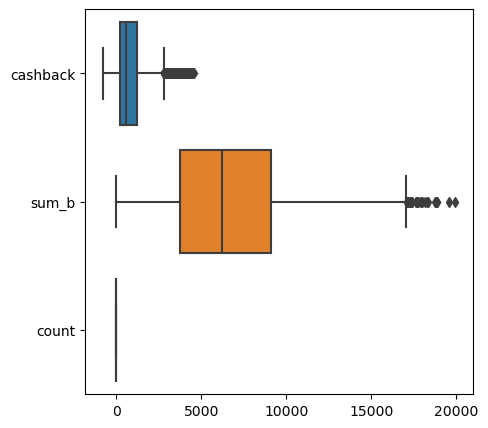

In [28]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data_b_sum, orient='h')

<Axes: >

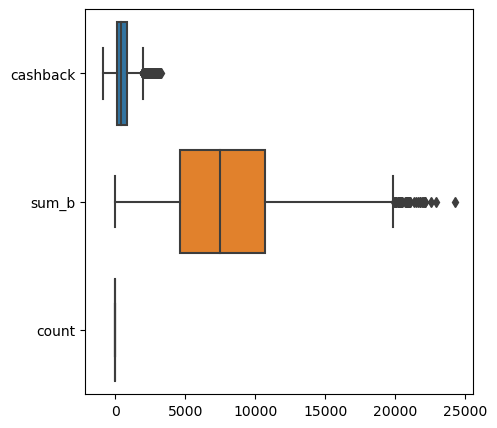

In [29]:
plt.figure(figsize=(5, 5))
sns.boxplot(data=data_a_sum, orient='h')

In [30]:
data_b_sum.corr()

,cashback,sum_b,count
cashback,1.000000,0.168405,0.008254
sum_b,0.168405,1.000000,-0.014532
count,0.008254,-0.014532,1.000000


In [31]:
data_a_sum.corr()

,cashback,sum_b,count
cashback,1.000000,0.128980,0.020052
sum_b,0.128980,1.000000,0.009581
count,0.020052,0.009581,1.000000


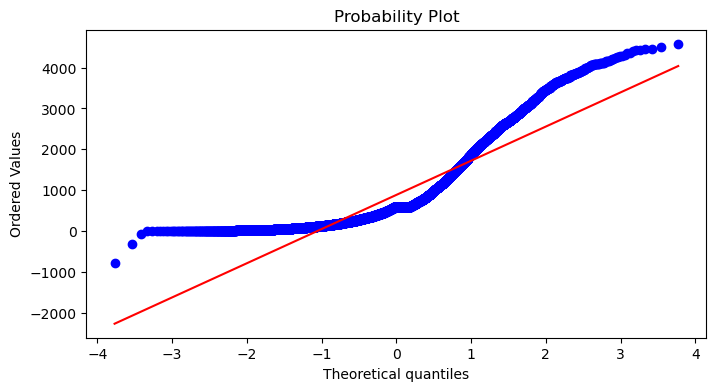

In [32]:
plt.figure(figsize=(8, 4))
st.probplot(data_b_sum['cashback'], dist='norm', plot=plt)
plt.show()

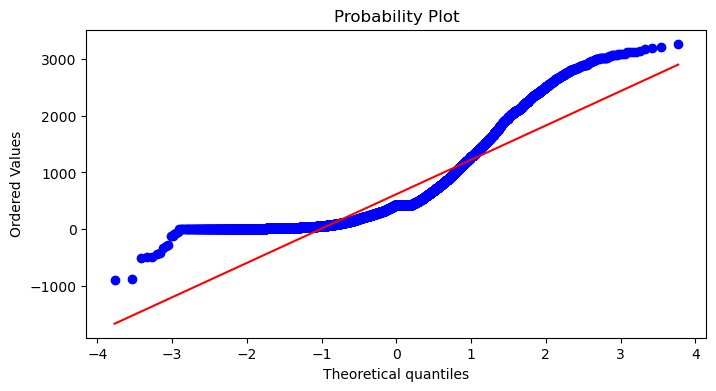

In [33]:
plt.figure(figsize=(8, 4))
st.probplot(data_a_sum['cashback'], dist='norm', plot=plt)
plt.show()

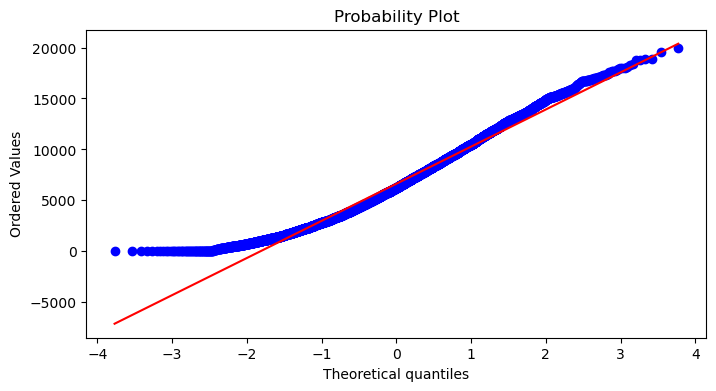

In [34]:
plt.figure(figsize=(8, 4))
st.probplot(data_b_sum['sum_b'], dist='norm', plot=plt)
plt.show()

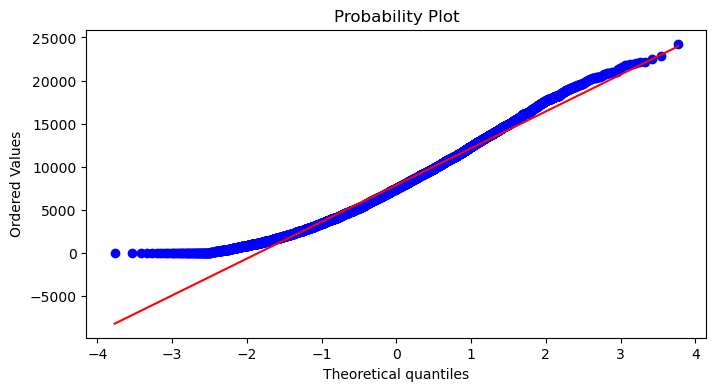

In [35]:
plt.figure(figsize=(8, 4))
st.probplot(data_a_sum['sum_b'], dist='norm', plot=plt)
plt.show()

In [36]:
print('H0: кешбек до и после одинаковы.')
print('H1: кешбек до и после не одинаковы.')
print()
stat, p = st.mannwhitneyu(data_b_sum['cashback'], data_a_sum['cashback'])
alpha = 0.05
if p / 2 < alpha and data_b_sum['cashback'].mean() > data_a_sum['cashback'].mean():
    print(f'p-value = {p}\nОтвергаем нулевую гипотезу о том, что распределения двух выборок одинаковы.\nМежду выборками есть статистически значимые различия. Сумма кешбека уменьшилась.')
else:
    print(f'p-value = {p}\nНет оснований отвергнуть нулевую гипотезу о том, что распределения двух выборок одинаковы.\nМежду выборками нет статистически значимых различий.')

H0: кешбек до и после одинаковы.
H1: кешбек до и после не одинаковы.

p-value = 9.926603254522225e-92
Отвергаем нулевую гипотезу о том, что распределения двух выборок одинаковы.
Между выборками есть статистически значимые различия. Сумма кешбека уменьшилась.


In [37]:
print('H0: суммы покупок до и после одинаковы.')
print('H1: суммы покупок до и после не одинаковы.')
print()
stat, p = st.mannwhitneyu(data_b_sum['sum_b'], data_a_sum['sum_b'])
alpha = 0.05
if p / 2 < alpha and data_b_sum['sum_b'].mean() < data_a_sum['sum_b'].mean():
    print(f'p-value = {p}\nОтвергаем нулевую гипотезу о том, что распределения двух выборок одинаковы.\nМежду выборками есть статистически значимые различия. Сумма покупок увеличилась.')
else:
    print(f'p-value = {p}\nНет оснований отвергнуть нулевую гипотезу о том, что распределения двух выборок одинаковы.\nМежду выборками нет статистически значимых различий.')

H0: суммы покупок до и после одинаковы.
H1: суммы покупок до и после не одинаковы.

p-value = 1.6040919971847163e-77
Отвергаем нулевую гипотезу о том, что распределения двух выборок одинаковы.
Между выборками есть статистически значимые различия. Сумма покупок увеличилась.


In [38]:
# напишем функцию, которая будет строить парную линейную регрессию и немножко её анализировать:
def modeler(data, x, y):
    # data - таблица с данными
    # x - фактор (независимая переменная, от которой зависит y)
    # y - результат (зависимая переменная)
    
    # добавляем столбцы, которые пот=могут нам построить уравнение регрессии:
    data['x^2'] = data[x] ** 2    
    data['xy'] = data[x] * data[y]
    n = data.shape[0]    # объем выборки
    b_1 = (data['xy'].mean() - data[y].mean() * data[x].mean()) / (data['x^2'].mean() - data[x].mean() ** 2)    # коэффициент регресии
    b_0 = data[y].mean() - b_1 * data[x].mean()    # свободный член уранения регрессии
    print(f'Уравнение парной линейной регрессии: y = {b_0} + ({b_1})*x')
    print()
    # проверим направление связи (прямая - вместе с ростом х, растет у; обратная - х растет, у убывает):
    if b_1 < 0:
        print('Направление связи - обратное.')
    else:
        print('Направление связи - прямое.')
    print()
    # в этом столбце будут находится выровненные значения результата, которые должны быть исходя из уравнения регрессии:
    data['y^'] = b_0 + b_1 * data[x]
    # построим графики:
    plt.figure(figsize=(8, 4))
    plt.scatter(data[x], data[y])    # фактические значения результата
    plt.plot(data[x], data['y^'], color='red')    # прямая с теоретическими (выровненными) значениями результата
    plt.show()
    y_mean = data[y].mean()    # выборочное среднее значение результата
    data['(y^ - y_mean)^2'] = (data['y^'] - y_mean) ** 2    # объясненная дисперсия
    data['(y - y_mean)^2'] = (data[y] - y_mean) ** 2    # общая дисперсия
    R_sq = data['(y^ - y_mean)^2'].sum() / data['(y - y_mean)^2'].sum()    # коэффициент детерминации
    print(f'Вариация результата на {round(R_sq * 100, 2)}% обясняется вариацией фактора.')
    r = R_sq ** 0.5    # коэффициент корреляции
    # проверим силу связи в построенном нами уравнении:
    if r < 0.3:
        print('По шкале Чеддока связь в уравнении регресии слабая.')
    elif 0.3 <= r < 0.5:
        print('По шкале Чеддока связь в уравнении регресии умеренная.')
    elif 0.5 <= r < 0.7:
        print('По шкале Чеддока связь в уравнении регресии заметная.')
    elif 0.7 <= r < 0.9:
        print('По шкале Чеддока связь в уравнении регресии тесная.')
    elif r >= 0.9:
        print('По шкале Чеддока связь в уравнении регресии очень тесная.')
    # прверим значимость нашего уравнения:
    F_fact = R_sq / (1 - R_sq) * (n - 2)
    q = 0.95
    F_table = st.f.ppf(q=q, dfn=1, dfd=n-2)
    if F_fact >= F_table:
        print('Уравнение значимо.')
    else:
        print('Уравнение не значимо.')

Уравнение парной линейной регрессии: y = 872.5244200626257 + (5.411775709082899)*x

Направление связи - прямое.



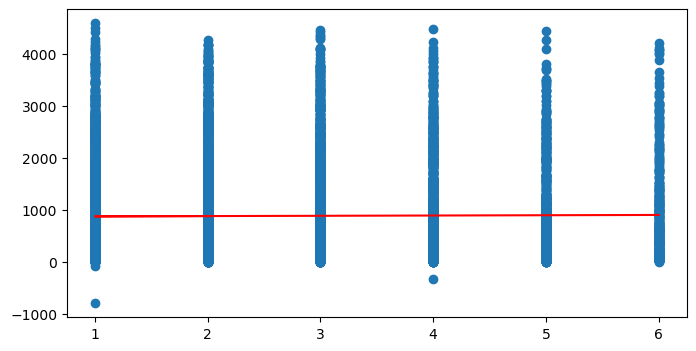

Вариация результата на 0.01% обясняется вариацией фактора.
По шкале Чеддока связь в уравнении регресии слабая.
Уравнение не значимо.


In [39]:
modeler(data=data_b_sum, x='count', y='cashback')

Уравнение парной линейной регрессии: y = 607.5165331556996 + (0.04213720886580246)*x

Направление связи - прямое.



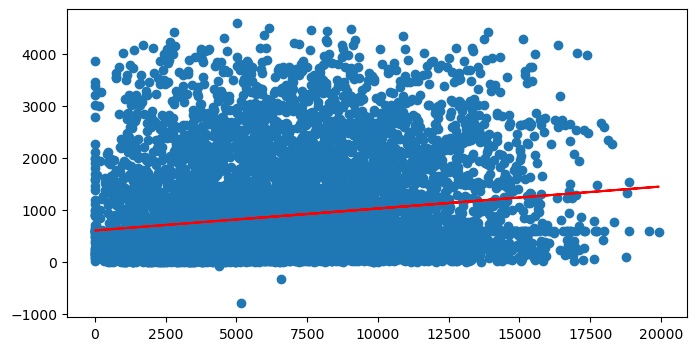

Вариация результата на 2.84% обясняется вариацией фактора.
По шкале Чеддока связь в уравнении регресии слабая.
Уравнение значимо.


In [40]:
modeler(data=data_b_sum, x='sum_b', y='cashback')

Уравнение парной линейной регрессии: y = 592.1803791602272 + (9.539502643869017)*x

Направление связи - прямое.



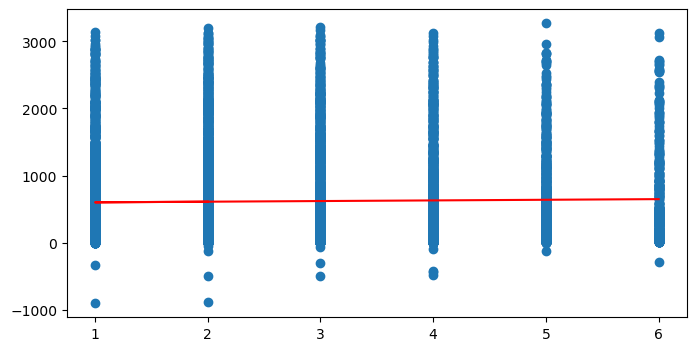

Вариация результата на 0.04% обясняется вариацией фактора.
По шкале Чеддока связь в уравнении регресии слабая.
Уравнение не значимо.


In [41]:
modeler(data=data_a_sum, x='count', y='cashback')

Уравнение парной линейной регрессии: y = 459.3520009702672 + (0.020038555289519117)*x

Направление связи - прямое.



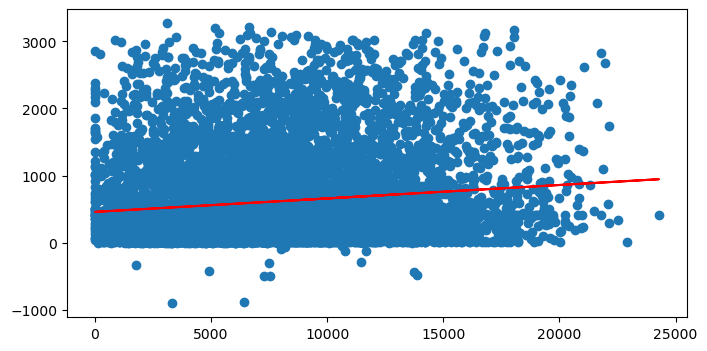

Вариация результата на 1.66% обясняется вариацией фактора.
По шкале Чеддока связь в уравнении регресии слабая.
Уравнение значимо.


In [42]:
modeler(data=data_a_sum, x='sum_b', y='cashback')

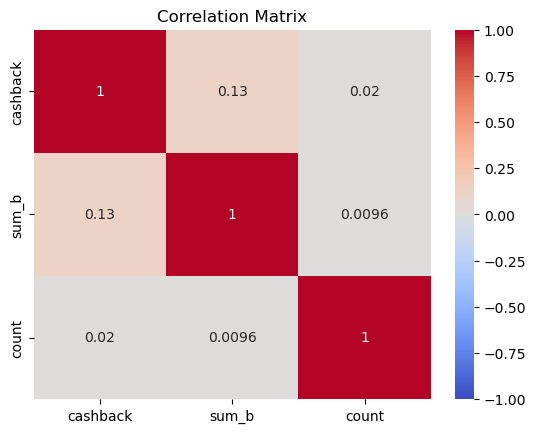

In [44]:
selected_columns = ['cashback', 'sum_b', 'count']
selected_data = data_a_sum[selected_columns]

corr_matrix = selected_data.corr()

# Визуализация с использованием seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

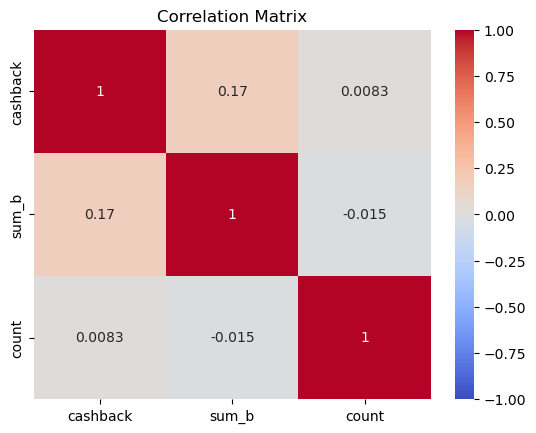

In [46]:
selected_columns = ['cashback', 'sum_b', 'count']
selected_data = data_b_sum[selected_columns]

corr_matrix = selected_data.corr()

# Визуализация с использованием seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()